# import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# importing data

In [5]:
path = r'C:\Users\nrsmi\OneDrive\Documents\CareerFoundry\09-2024 Advanced Analytics & Dashboard\Python\10-2024 Analyzing Global Temperature Changes'
df = pd.read_csv(os.path.join(path, '02_Data', 'Prepared Data', 'temperature_data_cleaned.csv'), index_col = False)
df_orig = pd.read_csv(os.path.join(path, '02_Data', 'Original Data', 'temperature_data_RAW.csv'), index_col = False)

In [6]:
pd.set_option('display.max_columns', None)  # Display all columns

In [7]:
df_orig.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,-2.298,0.804,-1.487,-1.305,-2.951,-1.184,-0.490,2.409,-3.014,-0.663,1.141,-0.393,1.724,0.678,0.524,-0.058,0.435,0.332,2.655,1.150,-1.108,0.634,0.018,0.582,-0.821,1.087,1.297,-0.718,1.426,0.950,0.859,1.565,-0.603,1.606,2.479,2.707,0.109,-1.606,0.431,-5.553,1.518,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,-3.167,1.809,0.816,-7.722,1.838,-3.706,-1.239,-1.620,-0.156,-0.369,1.072,-1.222,1.088,-2.101,0.460,-4.321,2.467,-0.286,1.409,0.170,-2.890,-0.310,-1.373,-0.120,1.414,-1.412,-0.149,0.870,0.043,-0.540,3.222,-0.901,0.707,0.985,1.816,2.871,-1.506,4.725,1.645,-2.332,2.494,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,2.481,-0.915,1.658,-1.784,-0.473,1.001,-0.585,-2.817,3.377,-1.536,-1.420,-0.628,1.166,-1.781,-2.406,1.761,-0.160,-3.087,1.330,-0.056,0.065,-1.000,-0.901,-2.220,-1.449,1.312,-1.451,-0.336,-0.005,-0.576,-0.217,-0.267,1.229,1.949,-0.158,2.753,1.663,1.847,-0.201,4.172,2.362,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [8]:
# drop the unit column, as it's not necessary
df_orig = df_orig.drop(columns=['Unit']) 

In [9]:
# remove Y from beginning of all year columns
df_orig.columns = [col[1:] if col.startswith('Y') else col for col in df_orig.columns] 

In [10]:
df_orig.head()

,Area Code,Area,Months Code,Months,Element Code,Element,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,2,Afghanistan,7001,January,7271,Temperature change,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,-2.298,0.804,-1.487,-1.305,-2.951,-1.184,-0.490,2.409,-3.014,-0.663,1.141,-0.393,1.724,0.678,0.524,-0.058,0.435,0.332,2.655,1.150,-1.108,0.634,0.018,0.582,-0.821,1.087,1.297,-0.718,1.426,0.950,0.859,1.565,-0.603,1.606,2.479,2.707,0.109,-1.606,0.431,-5.553,1.518,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,-3.167,1.809,0.816,-7.722,1.838,-3.706,-1.239,-1.620,-0.156,-0.369,1.072,-1.222,1.088,-2.101,0.460,-4.321,2.467,-0.286,1.409,0.170,-2.890,-0.310,-1.373,-0.120,1.414,-1.412,-0.149,0.870,0.043,-0.540,3.222,-0.901,0.707,0.985,1.816,2.871,-1.506,4.725,1.645,-2.332,2.494,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,2.481,-0.915,1.658,-1.784,-0.473,1.001,-0.585,-2.817,3.377,-1.536,-1.420,-0.628,1.166,-1.781,-2.406,1.761,-0.160,-3.087,1.330,-0.056,0.065,-1.000,-0.901,-2.220,-1.449,1.312,-1.451,-0.336,-0.005,-0.576,-0.217,-0.267,1.229,1.949,-0.158,2.753,1.663,1.847,-0.201,4.172,2.362,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [11]:
# melt the dataframe

df_melted = pd.melt(df_orig, id_vars=['Area Code', 'Area', 'Months Code','Months', 'Element Code', 'Element'], var_name='Year', value_name='Temperature')
print(df_melted)

        Area Code         Area  Months Code               Months  \
0               2  Afghanistan         7001              January   
1               2  Afghanistan         7001              January   
2               2  Afghanistan         7002             February   
3               2  Afghanistan         7002             February   
4               2  Afghanistan         7003                March   
...           ...          ...          ...                  ...   
569699       5873         OECD         7018          Jun–Jul–Aug   
569700       5873         OECD         7019          Sep–Oct–Nov   
569701       5873         OECD         7019          Sep–Oct–Nov   
569702       5873         OECD         7020  Meteorological year   
569703       5873         OECD         7020  Meteorological year   

        Element Code             Element  Year  Temperature  
0               7271  Temperature change  1961        0.777  
1               6078  Standard Deviation  1961        1.950

In [12]:
df_melted.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Year,Temperature
0,2,Afghanistan,7001,January,7271,Temperature change,1961,0.777
1,2,Afghanistan,7001,January,6078,Standard Deviation,1961,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,1961,-1.743
3,2,Afghanistan,7002,February,6078,Standard Deviation,1961,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,1961,0.516


In [13]:
df_melted['Element'] = df_melted['Element'].replace({
    'Temperature change': 'Temperature Change'})
df_melted.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Year,Temperature
0,2,Afghanistan,7001,January,7271,Temperature Change,1961,0.777
1,2,Afghanistan,7001,January,6078,Standard Deviation,1961,1.950
2,2,Afghanistan,7002,February,7271,Temperature Change,1961,-1.743
3,2,Afghanistan,7002,February,6078,Standard Deviation,1961,2.597
4,2,Afghanistan,7003,March,7271,Temperature Change,1961,0.516


In [14]:
df_melted.dtypes

Area Code         int64
Area             object
Months Code       int64
Months           object
Element Code      int64
Element          object
Year             object
Temperature     float64
dtype: object

In [15]:
#make sure Year is a number
df_melted['Year'] = df_melted['Year'].astype(int)

In [16]:
df_melted.dtypes

Area Code         int64
Area             object
Months Code       int64
Months           object
Element Code      int64
Element          object
Year              int32
Temperature     float64
dtype: object

In [17]:
# Export df_melted to .csv
df_melted.to_csv(os.path.join(path, '02_Data','Prepared Data', 'df_melted_full.csv'))

In [18]:
# drop the unit column, as it's not necessary
df_melted2 = df_melted.drop(columns=['Area Code', 'Months Code', 'Element Code']) 

In [19]:
df_melted2.rename(columns={'Area': 'Country'}, inplace=True)

In [20]:
df_melted2

,Country,Months,Element,Year,Temperature
0,Afghanistan,January,Temperature Change,1961,0.777
1,Afghanistan,January,Standard Deviation,1961,1.950
2,Afghanistan,February,Temperature Change,1961,-1.743
3,Afghanistan,February,Standard Deviation,1961,2.597
4,Afghanistan,March,Temperature Change,1961,0.516
...,...,...,...,...,...
569699,OECD,Jun–Jul–Aug,Standard Deviation,2019,0.247
569700,OECD,Sep–Oct–Nov,Temperature Change,2019,1.233
569701,OECD,Sep–Oct–Nov,Standard Deviation,2019,0.378
569702,OECD,Meteorological year,Temperature Change,2019,1.297


In [21]:
df_melted2.to_csv(os.path.join(path, '02_Data','Prepared Data', 'df_melted.csv'))

# 3. Create a correlation matrix heatmap (colored)

In [23]:
# select only Temperature change values
df_TC = df_melted2[df_melted2['Element'] == 'Temperature Change']

In [24]:
df_TC.head()

,Country,Months,Element,Year,Temperature
0,Afghanistan,January,Temperature Change,1961,0.777
2,Afghanistan,February,Temperature Change,1961,-1.743
4,Afghanistan,March,Temperature Change,1961,0.516
6,Afghanistan,April,Temperature Change,1961,-1.709
8,Afghanistan,May,Temperature Change,1961,1.412


In [25]:
#select only numerical columns
numerical_columns = df_TC.select_dtypes(include=['int', 'float'])
# Create a correlation matrix using pandas
numerical_columns.corr()

,Year,Temperature
Year,1.00000,0.44319
Temperature,0.44319,1.00000


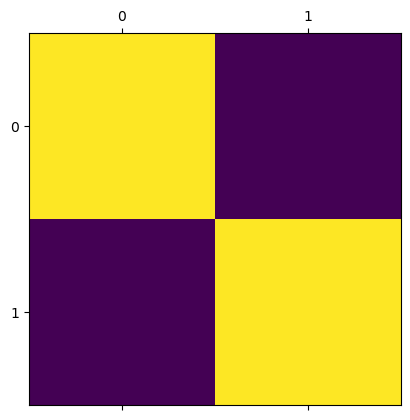

In [26]:
# Create a correlation heatmap using matplotlib

plt.matshow(numerical_columns.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

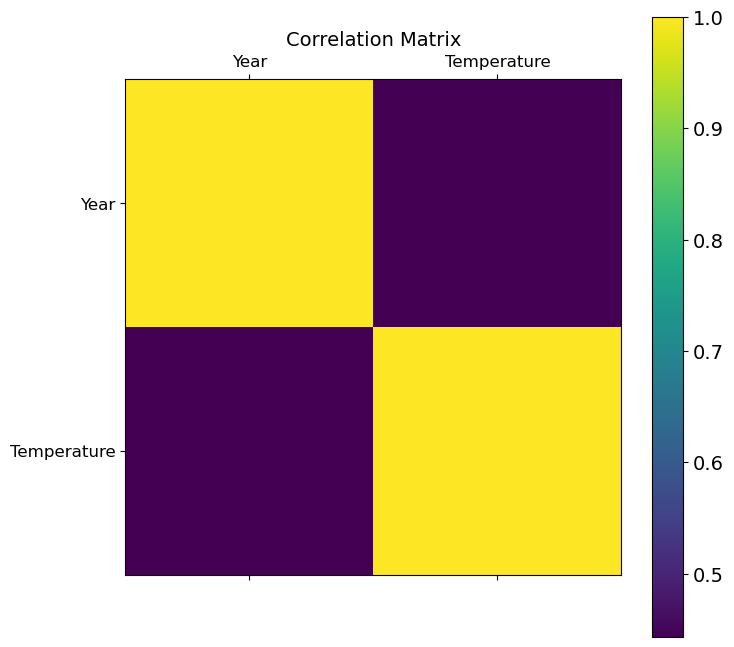

In [27]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
corr_matrix = plt.matshow(numerical_columns.corr(), fignum=f.number) # type of plot
plt.xticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12, rotation=0) # x axis labels
plt.yticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [28]:
# save correlation heatmap as png
corr_matrix.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'Correlation Matrix4.png'))

## This heatmap shows how "Year" and "Temperature" are related in the dataset. The diagonal boxes are lightest because each variable is perfectly related to itself. However, the box that compares "Year" and "Temperature" is very dark, meaning the data suggests there is little or no connection between them. 

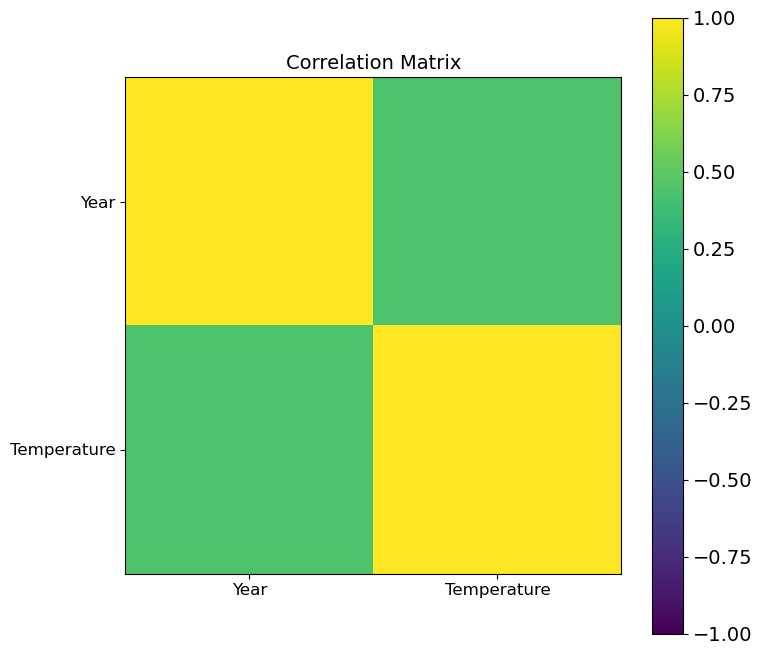

In [30]:
# set the vmin=-1, vmax=1
corr1 = numerical_columns.corr()

# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(8, 8))  # figure size 
corr_matrix2 = plt.imshow(corr1, vmin=-1, vmax=1)  # set vmin, vmax, and use 'coolwarm' colormap

plt.xticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12, rotation=0)  # x axis labels
plt.yticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12)  # y axis labels

cb = plt.colorbar()  # add a color legend (colorbar)
cb.ax.tick_params(labelsize=14)  # adjust the font size of colorbar ticks

# Add title
plt.title('Correlation Matrix', fontsize=14)  # add title

# Show plot
plt.show()

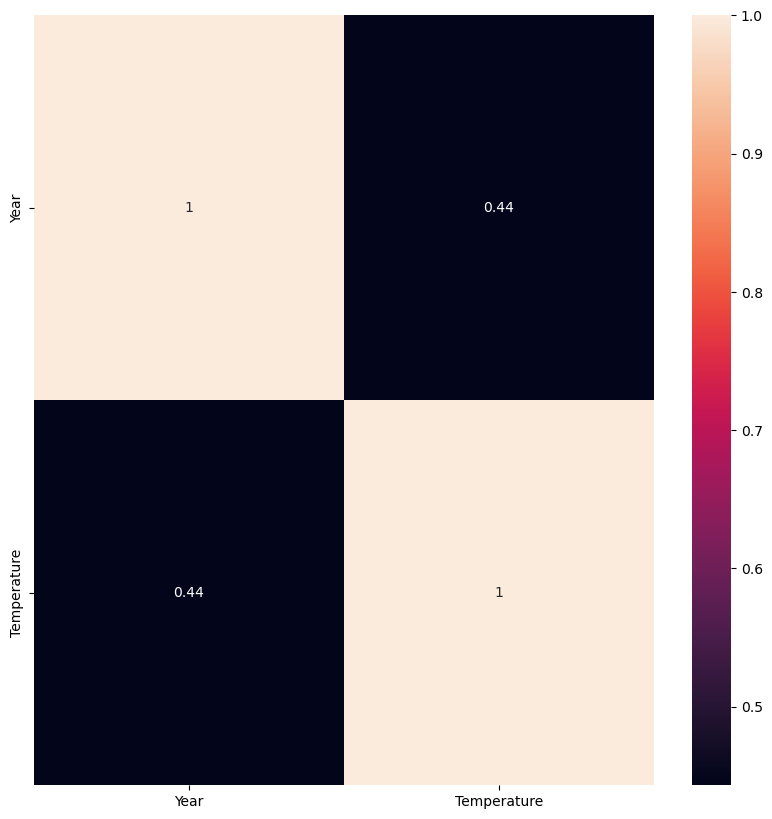

In [31]:
#Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(numerical_columns.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

In [32]:
# save as png
corr.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'Subplot2.png'))

# Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

(array([1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020., 2030.]),
 [Text(1950.0, 0, '1950'),
  Text(1960.0, 0, '1960'),
  Text(1970.0, 0, '1970'),
  Text(1980.0, 0, '1980'),
  Text(1990.0, 0, '1990'),
  Text(2000.0, 0, '2000'),
  Text(2010.0, 0, '2010'),
  Text(2020.0, 0, '2020'),
  Text(2030.0, 0, '2030')])

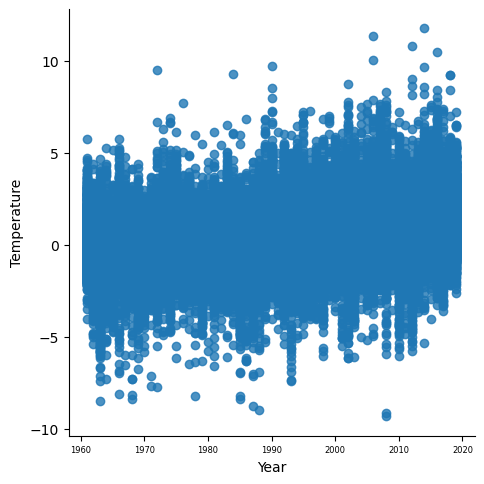

In [34]:
# Create a scatterplot

sns.lmplot(x = 'Year', y = 'Temperature', data = numerical_columns)
plt.xticks(fontsize=6)

## There is a trend upwards as the years progress, showing an indication of steadily increasing temperatures

# 5. Create a pair plot of the entire data set

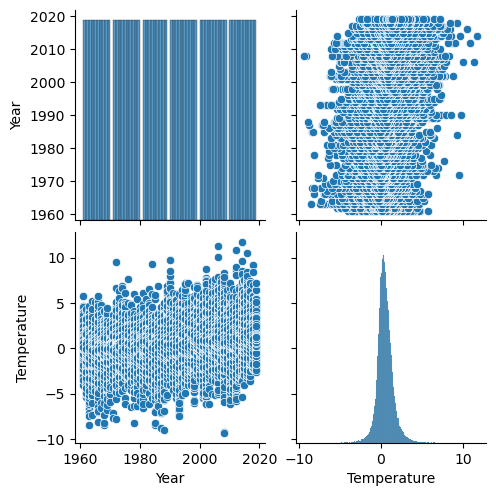

In [37]:
# Create a pair plot 
pairplot = sns.pairplot(numerical_columns)

## There is a trend upwards as the years progress, showing an indication of steadily increasing temperatures

# Histograms

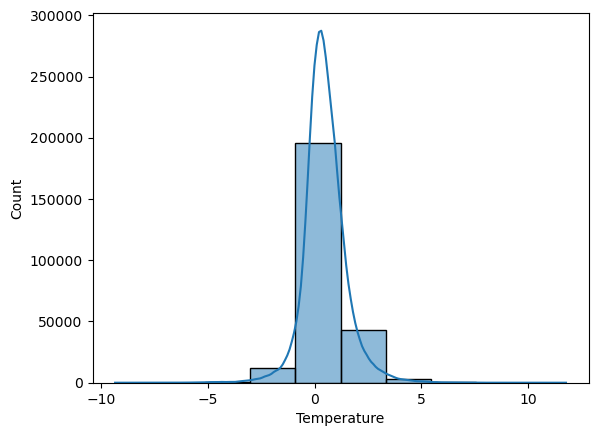

In [40]:
histplot = sns.histplot(numerical_columns['Temperature'], bins = 10, kde = True)

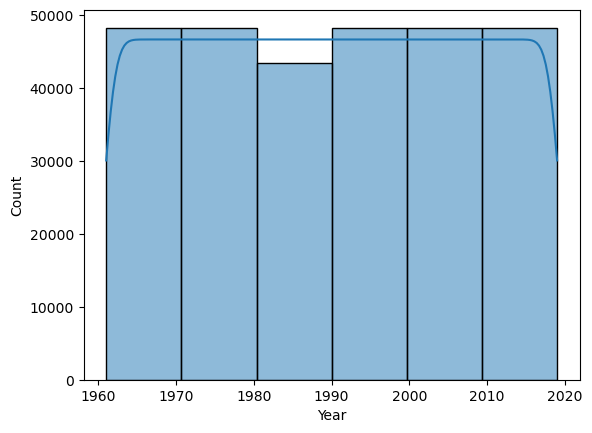

In [41]:
histplot2 = sns.histplot(numerical_columns['Year'], bins = 6, kde = True)

## the histograms show that most temperatures fall in the same range, which is not suprising as they are the meausre of either the variation of the standard deviation, or the changes in the average surface temperature.  There is also mostly the same ammount of data points for all years except 1980-1990, which have a few less datapoints than the other years.

# Create more categorical columns

In [44]:
countries_list = df_TC['Country'].value_counts(dropna = False)
countries_list

Country
Afghanistan                  1003
Saint Pierre and Miquelon    1003
Senegal                      1003
Saudi Arabia                 1003
Sao Tome and Principe        1003
                             ... 
Honduras                     1003
Hungary                      1003
Iceland                      1003
India                        1003
OECD                         1003
Name: count, Length: 284, dtype: int64

In [45]:
#countries_list.to_csv(os.path.join(path, '02_Data','Prepared Data', 'List of Countries.csv'))

In [85]:
#Rèunion
df_melted2['Country'] = df_melted2['Country'].str.replace('RÃ©union', 'Rèunion', regex=False)
df_melted2['Country'] = df_melted2['Country'].str.replace("CÃ´te d'Ivoire", "Côte d'Ivoire", regex=False)
df_melted2['Country'] = df_melted2['Country'].str.replace("Viet Nam", "Vietnam", regex=False)

In [87]:
df_melted2.shape

(569704, 5)

In [99]:
# create "Region" column
df_melted2['Region'] = ""
df_melted2.loc[df_melted2['Country'].isin(["Algeria", "Angola", "Anguilla", "Benin", "Botswana",
    "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon",
    "Central African Republic", "Chad", "Comoros", "Congo",
    "Côte d'Ivoire", "Democratic Republic of the Congo", "Djibouti",
    "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini",
    "Ethiopia", "Ethiopia PDR", "Gabon", "Gambia",
    "Ghana", "Grenada", "Guinea", "Guinea-Bissau",
    "Holy See", "Kenya", "Lesotho", "Liberia",
    "Libya", "Madagascar", "Malawi", "Mali",
    "Mauritania", "Mauritius", "Mayotte", "Morocco",
    "Mozambique", "Namibia", "Niger", "Nigeria",
    "Republic of Moldova", "Rwanda", "Sao Tome and Principe",
    "Senegal", "Seychelles", "Sierra Leone", "Somalia",
    "South Africa", "South Sudan", "Southern Africa",
    "Sudan", "Sudan (former)", "Togo", "Tunisia",
    "Uganda", "Zambia", "Zimbabwe"]), 'Region'] = 'Africa'
df_melted2.loc[df_melted2['Country'].isin(["Antigua and Barbuda", "Argentina", "Aruba", "Bahamas",
    "Barbados", "Belize", "Bolivia (Plurinational State of)",
    "Brazil", "Canada", "Caribbean", "Cayman Islands",
    "Chile", "Colombia", "Costa Rica", "Cuba",
    "Dominica", "Dominican Republic", "Ecuador", "El Salvador",
    "French Guiana", "Guatemala", "Guyana", "Haiti",
    "Honduras", "Jamaica", "Mexico", "Nicaragua",
    "Panama", "Paraguay", "Peru", "Puerto Rico",
    "Suriname", "Trinidad and Tobago", "Turks and Caicos Islands",
    "United States of America", "United States Virgin Islands",
    "Uruguay", "Venezuela (Bolivarian Republic of)"]), 'Region'] = 'Americas'
df_melted2.loc[df_melted2['Country'].isin([ "Afghanistan", "Armenia", "Azerbaijan", "Bahrain",
    "Bangladesh", "Belarus", "Bhutan", "Brunei Darussalam",
    "Cambodia", "China", "China, Hong Kong SAR", "China, Macao SAR",
    "China, mainland", "China, Taiwan Province of", "Democratic People's Republic of Korea",
    "India", "Indonesia", "Iran (Islamic Republic of)", "Iraq",
    "Israel", "Japan", "Jordan", "Kazakhstan",
    "Kuwait", "Kyrgyzstan", "Lao People's Democratic Republic", "Lebanon",
    "Malaysia", "Maldives", "Mongolia", "Myanmar",
    "Nepal", "Niue", "Oman", "Pakistan",
    "Palau", "Palestine", "Philippines", "Qatar",
    "Republic of Korea", "Saudi Arabia", "Singapore", "South-Eastern Asia",
    "Southern Asia", "Sri Lanka", "Syrian Arab Republic", "Tajikistan",
    "Thailand", "Timor-Leste", "Turkey", "Turkmenistan",
    "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"]), 'Region'] = 'Asia'
df_melted2.loc[df_melted2['Country'].isin(["Albania", "Andorra", "Austria", "Belgium",
    "Belgium-Luxembourg", "Bosnia and Herzegovina", "Bulgaria",
    "Croatia", "Cyprus", "Czechia", "Czechoslovakia",
    "Denmark", "Estonia", "Finland", "France",
    "Georgia", "Germany", "Greece", "Hungary",
    "Iceland", "Ireland", "Isle of Man", "Italy",
    "Latvia", "Liechtenstein", "Lithuania", "Luxembourg",
    "Malta", "Monaco", "Montenegro", "Netherlands",
    "North Macedonia", "Norway", "Poland", "Portugal",
    "Romania", "Russian Federation", "San Marino", "Serbia",
    "Serbia and Montenegro", "Slovakia", "Slovenia", "Southern Europe",
    "Spain", "Sweden", "Switzerland", "Ukraine",
    "United Kingdom", "Greenland"]), 'Region'] = 'Europe'
df_melted2.loc[df_melted2['Country'].isin(["American Samoa", "Australia", "Cook Islands", "Fiji",
    "Kiribati", "Marshall Islands", "Melanesia", "Micronesia",
    "Micronesia (Federated States of)", "Nauru", "New Zealand",
    "Norfolk Island", "Papua New Guinea", "Samoa",
    "Solomon Islands", "Tokelau", "Tonga", "Tuvalu",
    "Vanuatu", "Wake Island", "Wallis and Futuna Islands"]), 'Region'] = 'Oceania'
df_melted2.loc[df_melted2['Country'].isin(["Africa", "Americas",
    "Annex I countries", "Antarctica", "Asia", "Australia and New Zealand",
    "British Virgin Islands", "Central America", "Central Asia",
    "Channel Islands", "Christmas Island", "Cocos (Keeling) Islands",
    "Eastern Africa", "Eastern Asia", "Eastern Europe", "Europe",
    "European Union", "Falkland Islands (Malvinas)", "Faroe Islands",
    "French Polynesia", "French Southern and Antarctic Territories",
    "Gibraltar", "Guadeloupe", "Land Locked Developing Countries",
    "Least Developed Countries", "Low Income Food Deficit Countries",
    "Martinique", "Middle Africa", "Midway Island", "Montserrat",
    "Net Food Importing Developing Countries", "Netherlands Antilles (former)",
    "New Caledonia", "Non-Annex I countries", "Northern Africa",
    "Northern America", "Northern Europe", "Oceania", "OECD",
    "Pacific Islands Trust Territory", "Pitcairn Islands", "Polynesia",
    "Rèunion", "Saint Helena, Ascension and Tristan da Cunha",
    "Saint Kitts and Nevis", "Saint Lucia", "Saint Pierre and Miquelon",
    "Saint Vincent and the Grenadines", "Small Island Developing States",
    "South America", "South Georgia and the South Sandwich Islands",
    "Svalbard and Jan Mayen Islands", "United Republic of Tanzania",
    "USSR", "Western Africa", "Western Asia", "Western Europe",
    "Western Sahara", "World", "Yugoslav SFR", "RÃ©union"]), 'Region'] = 'Non-country'

In [101]:
df_melted2.head(100)

,Country,Months,Element,Year,Temperature,Region,Climate
0,Afghanistan,January,Temperature Change,1961,0.777,Asia,Continental
1,Afghanistan,January,Standard Deviation,1961,1.950,Asia,Continental
2,Afghanistan,February,Temperature Change,1961,-1.743,Asia,Continental
3,Afghanistan,February,Standard Deviation,1961,2.597,Asia,Continental
4,Afghanistan,March,Temperature Change,1961,0.516,Asia,Continental
...,...,...,...,...,...,...,...
95,Algeria,Mar–Apr–May,Standard Deviation,1961,0.562,Africa,Tropical
96,Algeria,Jun–Jul–Aug,Temperature Change,1961,-0.136,Africa,Tropical
97,Algeria,Jun–Jul–Aug,Standard Deviation,1961,0.460,Africa,Tropical
98,Algeria,Sep–Oct–Nov,Temperature Change,1961,0.667,Africa,Tropical


In [103]:
df_melted2.isnull().sum()

Country            0
Months             0
Element            0
Year               0
Temperature    78103
Region             0
Climate            0
dtype: int64

In [113]:
# create "Climate" column
df_melted2['Climate'] = ''
df_melted2.loc[df_melted2['Country'].isin([
    "Algeria", "American Samoa", "Angola", "Anguilla", "Antigua and Barbuda", "Argentina", 
    "Aruba", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belize", "Benin", 
    "Bolivia (Plurinational State of)", "Botswana", "Brazil", "British Virgin Islands", 
    "Brunei Darussalam", "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", 
    "Cameroon", "Caribbean", "Cayman Islands", "Central African Republic", 
    "Central America", "Chile", "Christmas Island", "Cocos (Keeling) Islands", 
    "Colombia", "Comoros", "Congo", "Cook Islands", "Costa Rica", "Côte d'Ivoire", 
    "Cuba", "Democratic Republic of the Congo", "Dominica", "Dominican Republic", 
    "Ecuador", "El Salvador", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", 
    "Ethiopia PDR", "Fiji", "French Guiana", "French Polynesia", "Gabon", "Gambia", 
    "Ghana", "Grenada", "Guadeloupe", "Guatemala", "Guinea", "Guinea-Bissau", 
    "Guyana", "Haiti", "Honduras", "Jamaica", "Kenya", "Kiribati", 
    "Lao People's Democratic Republic", "Lebanon", "Lesotho", "Liberia", "Madagascar", 
    "Malawi", "Malaysia", "Maldives", "Marshall Islands", "Mauritius", "Mayotte", 
    "Mexico", "Micronesia (Federated States of)", "Middle Africa", "Montserrat", 
    "Mozambique", "Namibia", "Nauru", "Nicaragua", "Niue", "Pakistan", "Panama", 
    "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Pitcairn Islands", 
    "Puerto Rico", "Qatar", "Rwanda", "Saint Helena, Ascension and Tristan da Cunha", 
    "Saint Kitts and Nevis", "Saint Lucia", "Saint Pierre and Miquelon", 
    "Saint Vincent and the Grenadines", "Samoa", "Sao Tome and Principe", 
    "Senegal", "Seychelles", "Sierra Leone", "Singapore", "Solomon Islands", 
    "South Africa", "South America", "South Sudan", "South-Eastern Asia", 
    "Sri Lanka", "Suriname", "Syrian Arab Republic", "Togo", "Tonga", 
    "Trinidad and Tobago", "Tunisia", "Turks and Caicos Islands", "Tuvalu", 
    "Uganda", "United Republic of Tanzania", "Uruguay", "Vanuatu", 
    "Venezuela (Bolivarian Republic of)", "Zambia", "Zimbabwe"]), 'Climate'] = 'Tropical'
df_melted2.loc[df_melted2['Country'].isin([
     "Chad", "Djibouti", "Egypt", "Gibraltar", "Iran (Islamic Republic of)", "Iraq", "Israel",
    "Jordan", "Kuwait", "Libya", "Mali", "Mauritania", "Morocco", "Niger", "Nigeria",
    "Northern Africa", "Oman", "Saudi Arabia", "Somalia", "Sudan", "Sudan (former)", 
    "Turkey", "Turkmenistan", "United Arab Emirates", "Yemen"]), 'Climate'] = 'Arid'
df_melted2.loc[df_melted2['Country'].isin([
    "Albania", "Andorra", "Australia", "Austria", "Belgium", "Belgium-Luxembourg", 
    "Bosnia and Herzegovina", "Bulgaria", "Canada", "Croatia", "Cyprus", "Czechia", 
    "Czechoslovakia", "Denmark", "Estonia", "Finland", "France", "Georgia", "Germany", 
    "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Liechtenstein", "Lithuania", 
    "Luxembourg", "Malta", "Monaco", "Montenegro", "Netherlands", "New Zealand", 
    "North Macedonia", "Norway", "Poland", "Portugal", "Republic of Korea", 
    "Republic of Moldova", "Romania", "Russian Federation", "San Marino", "Serbia", 
    "Serbia and Montenegro", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", 
    "Ukraine", "United Kingdom", "United States of America"]), 'Climate'] = 'Temperate'
df_melted2.loc[df_melted2['Country'].isin([
    "Afghanistan", "Armenia", "Azerbaijan", "Belarus", "Bhutan", "Central Asia", 
    "China", "China, Hong Kong SAR", "China, Macao SAR", "China, mainland", 
    "China, Taiwan Province of", "Democratic People's Republic of Korea", 
    "Eastern Europe", "India", "Indonesia", "Kazakhstan", "Kyrgyzstan", 
    "Mongolia", "Myanmar", "Nepal", "Northern Europe", "Southern Europe", 
    "Tajikistan", "Thailand", "Timor-Leste", "Uzbekistan", "Vietnam"]), 'Climate'] = 'Continental'
df_melted2.loc[df_melted2['Country'].isin([
    "Greenland", "Iceland", "South Georgia and the South Sandwich Islands", 
    "Svalbard and Jan Mayen Islands", "Wake Island", "Antarctica"]), 'Climate'] = 'Polar'
df_melted2.loc[df_melted2['Country'].isin(["Africa", "Americas", "Annex I countries", "Asia", "Australia and New Zealand", 
    "Channel Islands", "Eastern Africa", "Eastern Asia", "Europe", "European Union", 
    "Falkland Islands (Malvinas)", "Faroe Islands", "French Southern and Antarctic Territories", 
    "Holy See", "Isle of Man", "Japan", "Land Locked Developing Countries", 
    "Least Developed Countries", "Low Income Food Deficit Countries", "Martinique", 
    "Melanesia", "Micronesia", "Midway Island", "Net Food Importing Developing Countries", 
    "Netherlands Antilles (former)", "New Caledonia", "Non-Annex I countries", 
    "Norfolk Island", "Northern America", "Oceania", "OECD", 
    "Pacific Islands Trust Territory", "Palau", "Palestine", "Polynesia", 
    "Rèunion", "Small Island Developing States", "Southern Africa", 
    "Southern Asia", "Tokelau", "United States Virgin Islands", "USSR", 
    "Wallis and Futuna Islands", "Western Africa", "Western Asia", 
    "Western Europe", "Western Sahara", "World", "Yugoslav SFR", "RÃ©union"]), 'Climate'] = 'MISC'

In [107]:
df_melted2.head()

,Country,Months,Element,Year,Temperature,Region,Climate
0,Afghanistan,January,Temperature Change,1961,0.777,Asia,Continental
1,Afghanistan,January,Standard Deviation,1961,1.950,Asia,Continental
2,Afghanistan,February,Temperature Change,1961,-1.743,Asia,Continental
3,Afghanistan,February,Standard Deviation,1961,2.597,Asia,Continental
4,Afghanistan,March,Temperature Change,1961,0.516,Asia,Continental


In [109]:
df_melted2.isnull().sum()

Country            0
Months             0
Element            0
Year               0
Temperature    78103
Region             0
Climate            0
dtype: int64

In [111]:
df_melted2.to_csv(os.path.join(path, '02_Data','Prepared Data', 'df_melted_climate_region2.csv'))

In [ ]:
# select only Temperature change values
df_TC = df_melted2[df_melted2['Element'] == 'Temperature Change']

In [ ]:
df_TC.head()

# 6. Create a categorical plot and interpret the results

In [ ]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Year", y="Temperature", hue="Climate", data=df_TC, aspect = 5)

In [ ]:
df_Tropical = df_TC.loc[df_TC['Climate'].isin(['Tropical'])]                                    

In [ ]:
sns.set(style="ticks")
g2 = sns.catplot(x="Year", y="Temperature", data=df_Tropical, aspect = 5)

In [ ]:
sns.set(style="ticks")
h = sns.catplot(x="Months", y="Temperature", hue="Region", data=df_TC, aspect = 4)

# 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

### Is there evidence of global warming?
  - There seems to be an indication that temperatures are continuing to rise as the years go on

# 8. Define any hypotheses that you can at this point. You’ll be testing these later on.

- temperatures are likely on the rise